# Taylor Series

The Taylor series $ f_N(x) $ of order $ N $ of a function $ f(x) $ about the expansion point $ x_0 $ is defined as

$$ f_N(x) = \sum_{n=0}^N \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n $$

In this exercise, we want to deal with the Taylor series of the function

$$ f(x) = \sin(5x) + 0.4x^2 $$

around the expansion point $ x_0 = 0 $. The derivatives of $ f(x) $ are

$$ f'(x) = 5\cos(5x) + 0.8x $$

$$ f''(x) = -25\sin(5x) + 0.8 $$

In [ ]:
import Pkg
Pkg.instantiate()

In [22]:
using Plots

Let's plot the function $ f(x) $.

In [23]:
f(x) = sin(5 * x) + 0.4 * x^2
x = [0:0.01:1.0] # x values for plotting

1-element Vector{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}:
 0.0:0.01:1.0

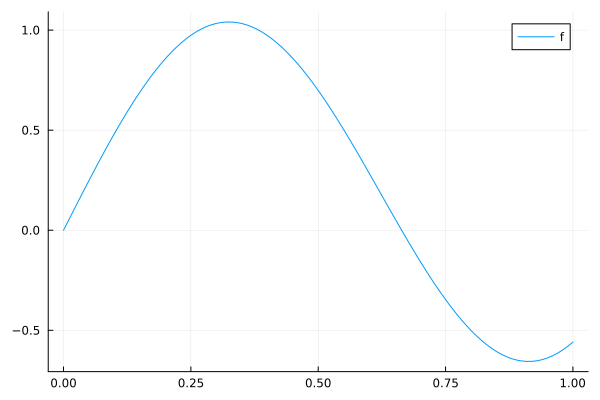

In [24]:
fig = plot()
plot!(fig, f, x, label="f")

Now we define the derivatives $ f'(x) $ and $ f''(x) $ of our function $ f(x) $.

In [25]:
d_f(x) = 5 * cos(5 * x) + 0.8 * x
d_d_f(x) = -25 * sin(5 * x) + 0.4

d_d_f (generic function with 1 method)

Define the point $ x_0 = 0 $ around which we want to expand the Taylor series. We will call it `a` in the following.

In [26]:
a=0

0

## The Constant Part - Taylor Series for $N=0$
$$f_0(x)=f(a)$$


Error: 0.6984721441039564


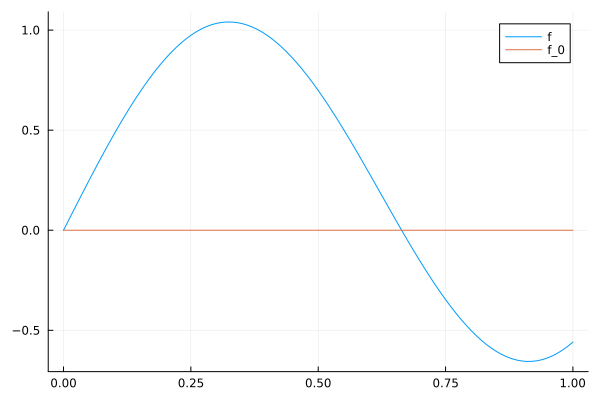

In [27]:
# Taylor series with only the constant part
f_0(h) = f(a)
error = f(0.5) - f_0(0.5) # Fehler bei x = 0.5
println("Error: ", error)
plot!(fig, f_0, x, label=f_0)

## Linear Part - Taylor Series for $N=1$
$$f_1(x)=f(a)+f'(a)(x-a)$$

Error: -1.8015278558960435


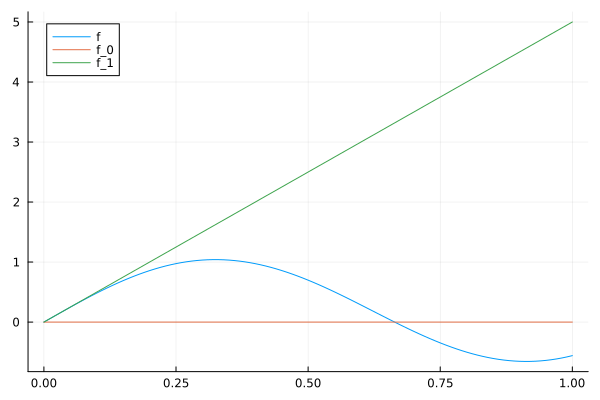

In [28]:
# Taylor series with constant and linear part 
f_1(h) = f(a) + d_f(a) * (h-a) 
error = f(0.5) - f_1(0.5)
println("Error: ", error)
plot!(fig, f_1, x, label=f_1)

## The Quadratic Part - Taylor Series for $N=2$

$$f_2(x)=f(a)+f'(a)(x-a)+\frac{f''(a)}{2}(x-a)^2$$

Error: -1.8515278558960433


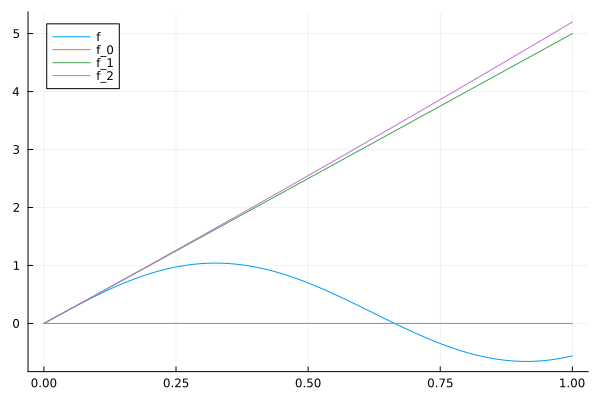

In [29]:
# Taylor series with constant, linear part and quadratic part
f_2(h) = f(a) + d_f(a) * (h-a) + 1 / 2 * d_d_f(a) * (h-a)^2
error = f(0.5) - f_2(0.5)
println("Error: ", error)
plot!(fig, f_2, x, label=f_2)

We can see that for the function $ f(x) $, the Taylor series $ f_2(x) $ with $ N=2 $ is not yet a good approximation at the point $ x=0.5 $. We can improve the Taylor series $ f_2(x) $ with $ N=2 $ by using the Taylor series $ f_3(x) $ with $ N=3 $. However, we do not want to endlessly expand our function $ f(x) $ around the expansion point $ x_0=a $. We want to use a function that calculates the Taylor series $ f_N(x) $ for any function $ f(x) $ and any expansion point $ x_0 $.

## Taylorseries Package


In [30]:
using TaylorSeries

We define a TaylorSeries object with $ N=3 $, thus a Taylor polynomial of third order. We use the TaylorSeries object to calculate the Taylor series $ f_3(x) $.

In [63]:
TS = Taylor1(Float64, 3)
t_f = f(TS)

 5.0 t + 0.4 t² - 20.833333333333332 t³ + 𝒪(t⁴)

Let's plot the function $ f(x) $ and the Taylor series we just computed.

Error: 0.7026388107706228


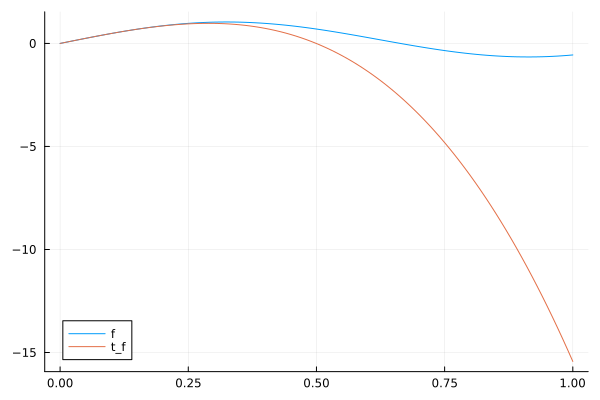

In [62]:
# define function to plot the taylor approximation
t_f_plot(x) = t_f(x)

fig = plot()
x = [0:0.01:1.0]
plot!(fig, f, x, label="f")
error = f(0.5) - t_f(0.5)
println("Error: ", error)
plot!(fig, t_f_plot, x, label="t_f")


How can we now calculate the Taylor series at a point other than $ x_0=0 $? We can define a new function that shifts our input values

$$ g(h) = f(h - x_0) $$

And compute the Taylor series of $ g(h) $ around the expansion point $ x_0=0 $.

In [59]:
a = 0.5
g(h) = f(a+h)
t_f_2 = g(TS)

 0.6984721441039564 - 3.6057180777346685 t - 7.080901801299455 t² + 16.690491990561117 t³ + 𝒪(t⁴)

Alternatively, we can compute the Taylor series $ f_N(x) $ around the expansion point $ x_0=0 $ and then shift the values of $ x_0 $ to $ x_0 + h $ by using the `taylor_expand` function and passing the expansion point.

In [60]:
p = taylor_expand(f, a, order=1)

 0.6984721441039564 - 3.6057180777346685 t + 𝒪(t²)

Error: 1.4867729903720583


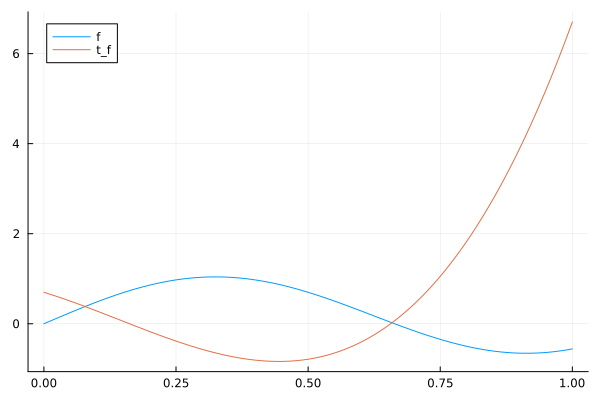

In [61]:
t_f_2_plot(x) = t_f_2(x)

fig = plot()
x = [0:0.01:1.0]
plot!(fig, f, x, label="f")
error = f(0.5) - t_f_2(0.5)
println("Error: ", error)
plot!(fig, t_f_2_plot, x, label="t_f")

Why does this now look different? We have calculated the Taylor series $ f_3(x) $ around the expansion point $ x_0=0 $, and subsequently shifted the values of $ x_0 $ to $ x_0 + h $. We have therefore calculated the Taylor series $ f_3(x) $ around the expansion point $ x_0=h $. However, at the moment, our Taylor series at the point $ x_0=h $ does not correspond to the function $ f(x) $. We must shift the values of $ x_0 $ to $ x_0 + h $ in order to have the correct function values for our Taylor series $ f_3(x) $ at the point $ x_0=h $.

Error: 0.0


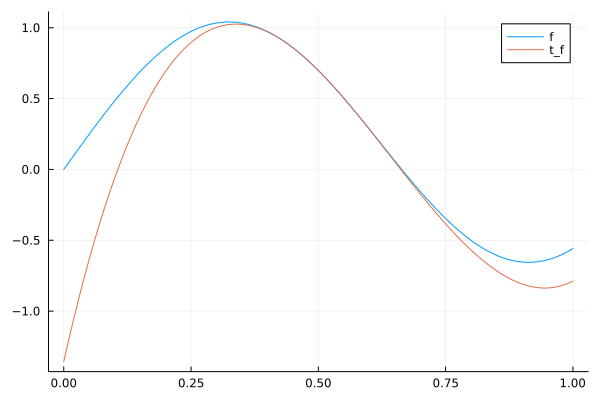

In [47]:
fig = plot()
x = [0:0.01:1.0]
plot!(fig, f, x, label="f")
t_f_2_g(h) = t_f_2(h-a) # wir verschieben t_f_2 um a damit wir die richtige Taylorreihe um a bekommen
error = f(0.5) - t_f_2_g(0.5)
println("Error: ", error)
plot!(fig, t_f_2_g, x, label="t_f")

Ok, we see that the result around the approximation point is better. But how does it look when we consider higher values? Let us compare the second and third orders in the range $ x \in [0,5] $.

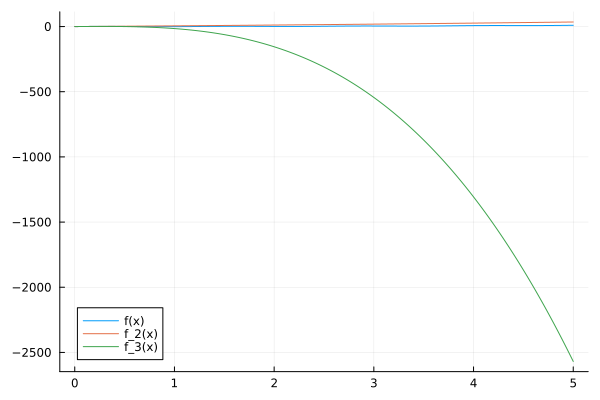

In [48]:
TS = Taylor1(Float64, 2)
t_f_2 = f(TS)
t_f_2_plot(x) = t_f_2(x)
TS = Taylor1(Float64, 3)
t_f_3 = f(TS)
t_f_3_plot(x) = t_f_3(x)

fig = plot()
x = [0:0.01:5.0]
plot!(fig, f, x, label="f(x)")
plot!(fig, t_f_2_plot, x, label="f_2(x)")
plot!(fig, t_f_3_plot, x, label="f_3(x)")

Where do the differences come from? 

Let's compute the Taylor series $f_100(x)$ with $N=100$. 

In [52]:
TS_2 = Taylor1(Float64, 100)
t_f_100 = f(TS_2)
t_f_100_plot(x) = t_f_100(x)

t_f_100_plot (generic function with 1 method)

Let's look at the result in the range $ x \in [0,5] $.

Error: -1.1102230246251565e-16


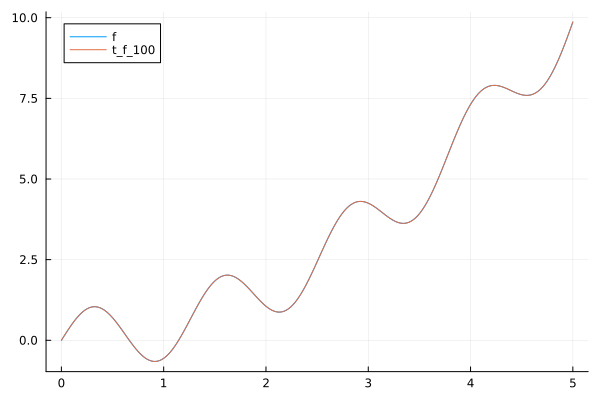

In [53]:
fig = plot()
plot!(fig, f, x, label="f")
error = f(0.5) - t_f_100(0.5)
println("Error: ", error)
plot!(fig, t_f_100_plot, x, label="t_f_100")

If we look closer: 

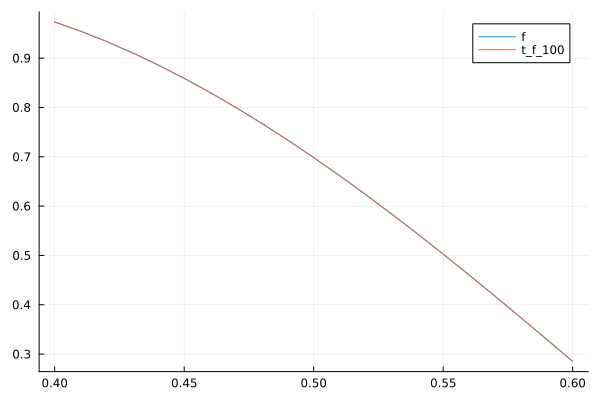

In [55]:
fig = plot()
x = [0.4:0.01:0.6]
plot!(fig, f, [0.4:0.01:0.6], label="f")
plot!(fig, t_f_100_plot, x, label="t_f_100")